<a href="https://colab.research.google.com/github/AlexandreKc/EV1_ML_CRISPDM/blob/main/Informe_Tecnico_FMY0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

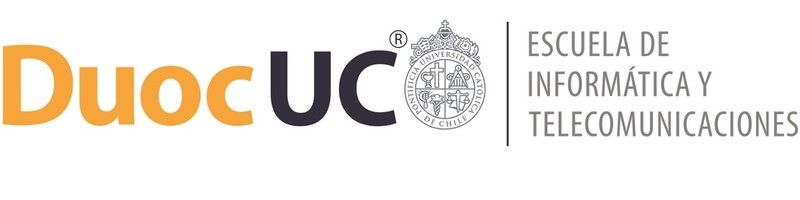

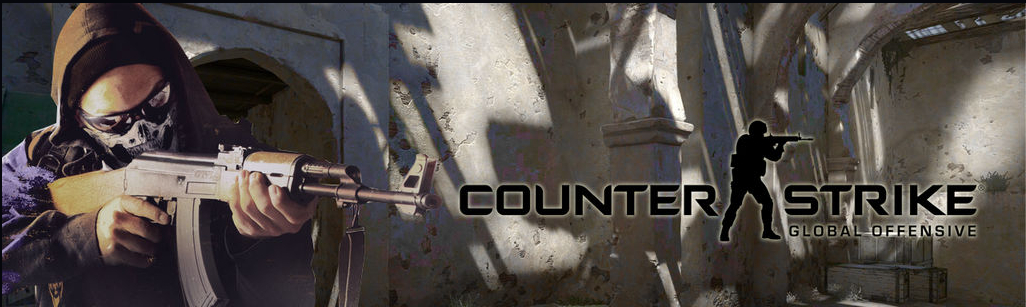

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
- Sebastián Carrera.
- Yasna Villarroel.
- Kevin Vivanco.

Docente:
- Giocrisrai Godoy Bonillo

Sección: 003V

#### Este informe presenta un análisis exhaustivo de los datos de partidas de Counter-Strike: Global Offensive (CS:GO), con el objetivo de proporcionar información valiosa y modelos predictivos para la empresa Valve.
#### El análisis se estructura siguiendo la metodología CRISP-DM, abarcando las fases de Entendimiento del Negocio, Comprensión de los Datos y Preparación de los Datos.

# Caso Fundamentos de Machine Learning

---
## Fase 1: Business Understanding
---

## **1.1 CONTEXTO DE NEGOCIO**
### **1.1.1 Descripción del Juego**

*   Valve, una empresa líder en la industria de los videojuegos, ha contactado a nuestro equipo de análisis de datos y modelado de Machine Learning para analizar y desarrollar modelos predictivos basados en datos de partidas de Counter-Strike: Global Offensive (CS:GO).
*   CS:GO es un juego de disparos en primera persona (FPS) táctico y competitivo, donde dos equipos de cinco jugadores se enfrentan. Estos equipos se denominan Terroristas (T) y Contra-Terroristas (CT).
*   En cada ronda, los equipos tienen objetivos distintos:
#####🔹 **Terroristas (T):** El principal objetivo de los Terroristas es plantar una bomba (denominada "C4") en uno de los dos sitios de bomba designados dentro del mapa. Una vez plantada, la bomba tiene un temporizador de 45 segundos antes de explotar.
#####🔹 **Contra-Terroristas (CT):** El objetivo de los Contra-Terroristas es evitar que los Terroristas planten la bomba. Si la bomba es plantada, los CT deben desactivarla antes de que explote. También pueden ganar la ronda eliminando a todos los jugadores Terroristas.
*   El juego se caracteriza por su economía, donde los jugadores ganan dinero en el juego por acciones como eliminar enemigos, ganar rondas o plantar/desactivar la bomba. Este dinero se utiliza para comprar armas, armaduras y equipamiento al comienzo de cada ronda. Las decisiones sobre qué comprar y cuándo pueden ser cruciales para el éxito.
*   Las partidas se dividen en rondas, y el primer equipo en alcanzar un número determinado de rondas ganadas gana la partida. Los equipos cambian de bando (T a CT o viceversa) a la mitad de la partida.

### **1.1.2 Cliente**
*   Valve Corporation
*   Valve es el desarrollador y distribuidor de CS:GO, así como el operador de la plataforma de distribución digital de videojuegos Steam.
*   Valve busca utilizar el análisis de datos y el modelado de Machine Learning para obtener información valiosa sobre el juego, lo que les permite tomar decisiones informadas sobre:
#####🔹 El equilibrio del juego
#####🔹 El diseño de mapas
#####🔹 El desarrollo de nuevas características
#####🔹 La experiencia del jugador en general

### **1.1.3 Datos Disponibles**
*   Los datos que se proporcionarán para el análisis corresponden a un conjunto de más de 7000 partidas de CS:GO. Cada partida involucra un máximo de 10 jugadores (5 por equipo).
*   La información se ha extraído de archivos de repetición (replays) de CS:GO. Los replays son archivos propietarios que contienen un registro detallado de cada acción realizada por cada jugador durante una partida. Esto incluye movimientos, disparos, compras, uso de equipamiento, etc.
*   Los replays han sido procesados y extraídos utilizando un "scrapper" (una herramienta que automatiza la extracción de datos) y luego preprocesados utilizando un script para limpiar y estructurar los datos.
*   El conjunto de datos final se presenta en formato CSV (Comma Separated Value), que es un formato tabular común para el almacenamiento y análisis de datos.
*   El dataset contiene 79.157 filas, donde cada fila corresponde a las acciones y el rendimiento de un jugador individual dentro de una ronda específica de una partida.
*   El dataset incluye 29 columnas que representan diversas variables que describen las acciones, el rendimiento y el contexto de cada jugador dentro del juego. Estas variables incluyen:
#####🔹**Información de la partida y la ronda** (e.g., Map, MatchId, RoundId)
#####🔹 **Información del equipo** (e.g., Team, InternalTeamId)
#####🔹 **Rendimiento del jugador** (e.g., Kills, Assists, Headshots, TimeAlive, TravelledDistance)
#####🔹 **Equipamiento** (e.g., RoundStartingEquipmentValue, TeamStartingEquipmentValue, PrimaryXXXX)
#####🔹 **Resultados** (e.g., RoundWinner, MatchWinner, Survived)
#####🔹 **Acciones** (e.g., RLethalGrenadesThrown, RNonLethalGrenadesThrown, FlankKills)

*   **Contexto:** El dataset proporciona una visión completa y detallada de las acciones de los jugadores en las partidas de CS:GO, lo que permite analizar diversos aspectos del juego, como el rendimiento individual, las estrategias de equipo y los factores que influyen en el resultado de las partidas.

$$
\boxed{
\begin{array}{|l|l|}
\hline
\textbf{Dato} & \textbf{Descripción} \\
\hline
\text{Map} & \text{Nombre del Mapa donde se jugó la partida} \\
\hline
\text{Team} & \text{Nombre de equipo al que pertenece el jugador} \\
\hline
\text{InternalTeamId} & \text{Identificador del equipo al que pertenece el jugador} \\
\hline
\text{MatchId} & \text{Identificador de la partida} \\
\hline
\text{RoundId} & \text{Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline
\text{MatchWinner} & \text{Indica si el jugador ganó o no la partida} \\
\hline
\text{RoundWinner} & \text{Indica si el jugador ganó o no la ronda analizada.} \\
\hline
\text{Survived} & \text{ Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar)} \\
\hline
\text{AbnormalMatch} & \text{Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline
\text{TimeAlive} & \text{Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline
\text{TravelledDistance} & \text{Distancia viajada por el jugador durante la partida.} \\
\hline
\text{RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text{Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline
\text{PrimaryXXXX} & \text{Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline
\text{[Match Round] Assists} & \text{Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline
\text{[Match|Round] Kills} & \text{Cantidad de kills efectuados por el jugador durante la partida o la ronda} \\
\hline
\text{[Match|Round] FlankKills} & \text{Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline
\text{[Match|Round] HeadShots} & \text{Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline
\text{RoundStartingEquipmentValue} & \text{Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline
\text{TeamStartingEquipmentValue} & \text{Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\hline
\end{array}
}
$$

## **1.2 OBJETIVOS DEL NEGOCIO**

*   Problema: El problema central que se abordará en este proyecto es comprender los factores que determinan el éxito de un equipo en CS:GO. Esto implica analizar la influencia de las diversas variables disponibles en el dataset para identificar patrones y relaciones que puedan explicar por qué algunos equipos ganan más partidas que otros.

*   Público objetivo: Los resultados de este análisis pueden ser de interés de jugadores que puedan estar atraidos por mejorar su desempeño, equipos profesionales, entrenadores y casas de apuesta.

*   Valve, como cliente principal, puede tener objetivos más específicos relacionados con el desarrollo del juego y la mejora de la experiencia del jugador.
*   Estos objetivos pueden incluir:
#####🔹  **Balance del juego:** Analizar si ciertas armas, mapas o estrategias proporcionan una ventaja injusta a un equipo.
#####🔹 **Diseño de mapas:** Comprender cómo los jugadores se mueven y utilizan los mapas para informar el diseño de futuros mapas.
#####🔹  **Emparejamiento de jugadores:** Mejorar el sistema de emparejamiento para crear partidas más equilibradas y competitivas.
#####🔹  **Detección de trampas:** Identificar patrones de juego que puedan indicar el uso de trampas.


## **1.3 OBJETIVOS DE DATA MINING**
### **1.3.1 Clasificación: ¿Se puede predecir si un jugador sobrevivirá la ronda?**
Descripción:
* Desarrollar un modelo de clasificación que, utilizando variables del desempeño del jugador y el contexto de la ronda, prediga si un jugador sobrevivirá o no la ronda.

Variables relevantes:
#####🔹  **Survived:** Sobrevivencia en la ronda.
#####🔹  **RoundKills:** Cantidad de enemigos eliminados por el jugador en la ronda.
#####🔹  **RoundHeadshots:** Cantidad de tiros a la cabeza realizados por el jugador en la ronda.
#####🔹  **RoundStartingEquipmentValue:** Valor del equipamiento del jugador al inicio de la ronda.

Hipótesis:
* "*La probabilidad de que un jugador sobreviva una ronda depende del valor de su equipamiento inicial y de su capacidad para eliminar enemigos durante la ronda.*"


---

### **1.3.2 Regresión: : ¿El Valor del Equipamiento afecta en del Desempeño general del equipo?**

Descripción:
* Desarrollar un modelo de regresión que analice cómo el valor del equipamiento impacta en el desempeño del equipo durante una partida, medido a través de variables como la cantidad de eliminaciones (kills), precisión en disparos a la cabeza (headshots) y eliminaciones por flanqueo (flank kills).

Variables relevantes:
* Valor de Equipamiento Inicial:
#####🔹  **TeamStartingEquipmentValue:** Principal variable predictora.

* Medidas de desempeño:
#####🔹  **MatchKills:** Número total de enemigos eliminados en la partida.
#####🔹  **MatchHeadshots:** Número total de disparos a la cabeza.
#####🔹  **MatchFlankKills:** Número total de eliminaciones al flanquear al oponente.

* Contexto adicional:
#####🔹  **Survived:** Sobrevivencia en la ronda.

Hipótesis:
* "*Un mayor valor de equipamiento mejora el desempeño del equipo en la partida, posiblemente aumentando la cantidad de kills dentro de la partida.*"

---
## Fase 2: Data Understanding
---

# 2.1 Análisis Exploratorio de Datos (EDA)

## **2.1.1 Carga de Librerías**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.impute import KNNImputer


## **2.1.2 Carga de Archivos**

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";")
#Aparentamente el DataSet, en las variebles del tiempo y distancia, tiene un formato europeo.
# Por lo que pandas interpreta mal los valores numéricos como object o string, en lugar de float.
# Una opción para evitar esos problemas es usando (, decimal=",", thousands=".") para la carga del dataset

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


<ipython-input-2-598d9e78a1ed>:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


## **2.1.3 Exploración Inicial de Datos**

In [ ]:
#Para ver las columnas dentro del DataSet
print(df.columns.tolist())

['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive', 'TravelledDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']


In [ ]:
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
# Últimos 5 datos del DataSet
df.tail()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
79152,123775,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,5600,27100,4,0,2,2
79153,123776,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,1,0,1,0,5500,27100,8,5,1,3
79154,123777,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,4950,27100,5,0,2,3
79155,123778,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,4950,27100,1,0,1,0
79156,123779,de_mirage,CounterTerrorist,2,511,5,False,False,True,False,...,4,0,2,0,6100,27100,5,1,1,2


In [ ]:
print ('Los datos tienen {0} filas y {1} columnas'.format(df.shape[0],df.shape[1]))

Los datos tienen 79157 filas y 30 columnas


In [ ]:
# Información de las filas y columnas del dataset.
# Si es que hay valores nulos y los tipos de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

## **2.1.4 Valores Nulos**

In [ ]:
#CHEQUEAMOS SI HAY DATOS FALTANTES
# Calcula la cantidad de valores nulos
null_values = df.isnull().sum()
#Filtra los valores
null_values = null_values[null_values > 0]
print (null_values)

Team           2
MatchWinner    1
dtype: int64


In [ ]:
#sumar los valores nulos para saber cuantos hay
df[['Team', 'MatchWinner']].isnull().sum()
for column in ['Team', 'MatchWinner']:
  null_percentage = (df[column].isnull().sum() / len(df)) * 100
  print(f"La columna '{column}' tiene un {null_percentage:.4f}% de valores nulos.")

La columna 'Team' tiene un 0.0025% de valores nulos.
La columna 'MatchWinner' tiene un 0.0013% de valores nulos.


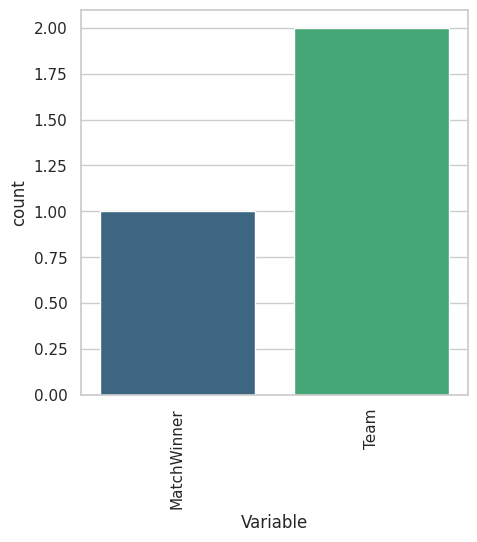

In [ ]:
# 1. Calcular los valores nulos
miss = df[['MatchWinner','Team']].isnull().sum()

# 2. Transformarlo en DataFrame
miss = miss.to_frame()

# 3. Cambiar nombres
miss.columns = ['count']
miss.index.names = ['Nombre']
miss['Variable'] = miss.index

# 4. Gráfico de barras
plt.figure(figsize=(5,5))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='Variable', y='count', hue='Variable', palette='viridis', legend=False, data=miss)
plt.xticks(rotation=90)
plt.show()

## **2.1.5 Exploración de Valores**

In [ ]:
# Para saber cuales son los valores únicos de cada columna

# Se itera a través de cada columna del DataFrame
for col in df.columns:
    # Obtiene todos los valores únicos de la columna actual
    unique_values = df[col].unique()

    # Comprueba el número de valores únicos de la columna actual
    if len(unique_values) > 50:
        # Si hay demasiados valores únicos, muestrear los 50 primeros
        top_occurring_values = df[col].value_counts().head(50).index.tolist()
        print(f"Column '{col}': {len(unique_values)} unique values. Top 50 values: {top_occurring_values}")
    else:
        # En caso contrario, imprimir todos los valores únicos
        print(f"Column '{col}': {len(unique_values)} unique values. All values: {unique_values}")

Column 'Unnamed: 0': 79157 unique values. Top 50 values: [123779, 600, 601, 602, 603, 123763, 123762, 123761, 123760, 123759, 123758, 123757, 123756, 123755, 123754, 123753, 123752, 123751, 123750, 123749, 123748, 636, 635, 634, 633, 632, 631, 630, 629, 628, 627, 626, 625, 624, 623, 622, 621, 652, 651, 650, 649, 648, 647, 646, 645, 644, 643, 642, 641, 640]
Column 'Map': 4 unique values. All values: ['de_inferno' 'de_nuke' 'de_mirage' 'de_dust2']
Column 'Team': 3 unique values. All values: ['Terrorist' 'CounterTerrorist' nan]
Column 'InternalTeamId': 2 unique values. All values: [1 2]
Column 'MatchId': 333 unique values. Top 50 values: [29, 113, 40, 451, 80, 434, 423, 510, 106, 115, 50, 213, 297, 278, 323, 237, 342, 229, 255, 431, 372, 338, 387, 39, 392, 385, 139, 180, 473, 477, 490, 83, 79, 73, 482, 239, 504, 314, 308, 319, 317, 207, 370, 161, 167, 212, 326, 151, 228, 265]
Column 'RoundId': 36 unique values. All values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

* Aquí se puede visualizar que las variables MatchWinner y RoundWinner que son de tipo Object, tienen valores que conceptualmente deberían ser Booleanos **['True', 'False'].**
* Y la variable RoundWinner tiene una inconsistencia en los datos, ya que estos son los valores que retorna: **['False' 'True' 'False4' True False]**
* La variable TimeALive se puede ver que no está en segundos, ya que son demasiado grandes los números.
* La variable TravelledDistance también se puede visualizar que los números son demasiado grandes.
* La variable AbnormalMatch es inútil, ya que todos sus valores son **'False'**.

In [ ]:
# Analisis de los valores de la Variable MatchWinner
unique_values = df['MatchWinner'].unique()
print("MatchWinner",unique_values)

# Analisis de los valores de la Variable RoundWinner
unique_values = df['RoundWinner'].unique()
print("RoundWinner",unique_values)

# Analisis de los valores de la Variable AbnormalMatch
unique_values = df['AbnormalMatch'].unique()
print("AbnormalMatch",unique_values)

MatchWinner [True False nan]
RoundWinner ['False' 'True' 'False4' True False]
AbnormalMatch [False]


## **2.1.6 OBJETIVO CLASIFICACIÓN: ¿Se puede predecir si un jugador sobrevivirá la ronda?**#

In [ ]:
# Revisar valores nulos en las variables
missing_data = df[['RoundKills', 'RoundHeadshots', 'RoundStartingEquipmentValue']].isnull().sum()
# Mostrar la cantidad de valores nulos
print("Cantidad de valores nulos en las variables :")
print(missing_data)
# También podemos ver el porcentaje de datos faltantes
missing_percentage = (missing_data / len(df)) * 100
print("\nPorcentaje de valores nulos en las variables :")
print(missing_percentage)

Cantidad de valores nulos en las variables :
RoundKills                     0
RoundHeadshots                 0
RoundStartingEquipmentValue    0
dtype: int64

Porcentaje de valores nulos en las variables :
RoundKills                     0.0
RoundHeadshots                 0.0
RoundStartingEquipmentValue    0.0
dtype: float64


Matriz de correlación:
                             RoundKills  RoundHeadshots  \
RoundKills                     1.000000        0.679179   
RoundHeadshots                 0.679179        1.000000   
RoundStartingEquipmentValue    0.172141        0.035972   
Survived                       0.331619        0.205279   

                             RoundStartingEquipmentValue  Survived  
RoundKills                                      0.172141  0.331619  
RoundHeadshots                                  0.035972  0.205279  
RoundStartingEquipmentValue                     1.000000  0.170578  
Survived                                        0.170578  1.000000  


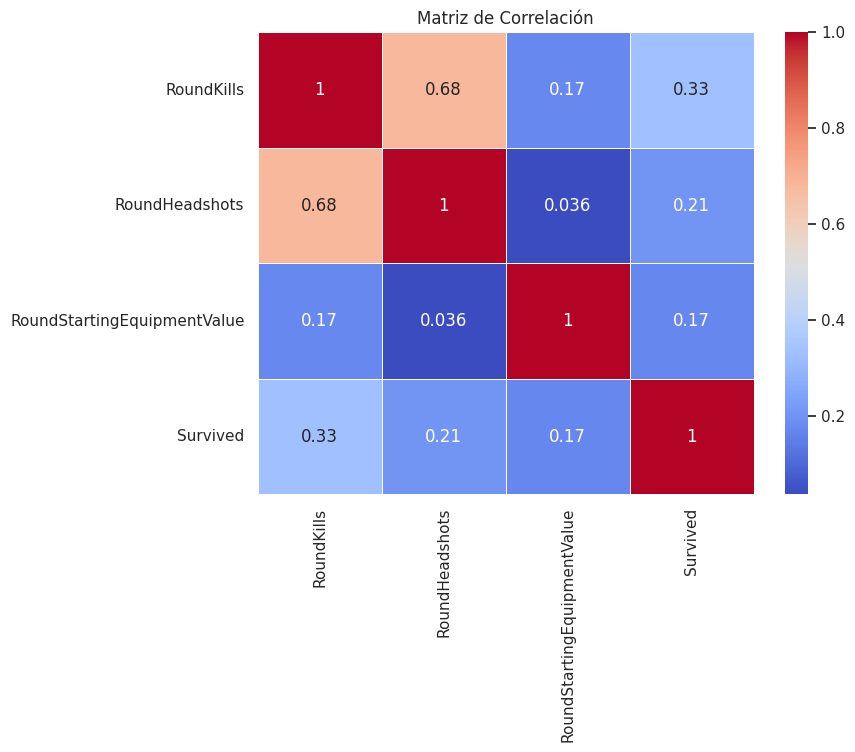

In [ ]:
# Calcular la matriz de correlación de las variables numéricas relevantes
correlation_matrix = df[['RoundKills', 'RoundHeadshots', 'RoundStartingEquipmentValue', 'Survived']].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

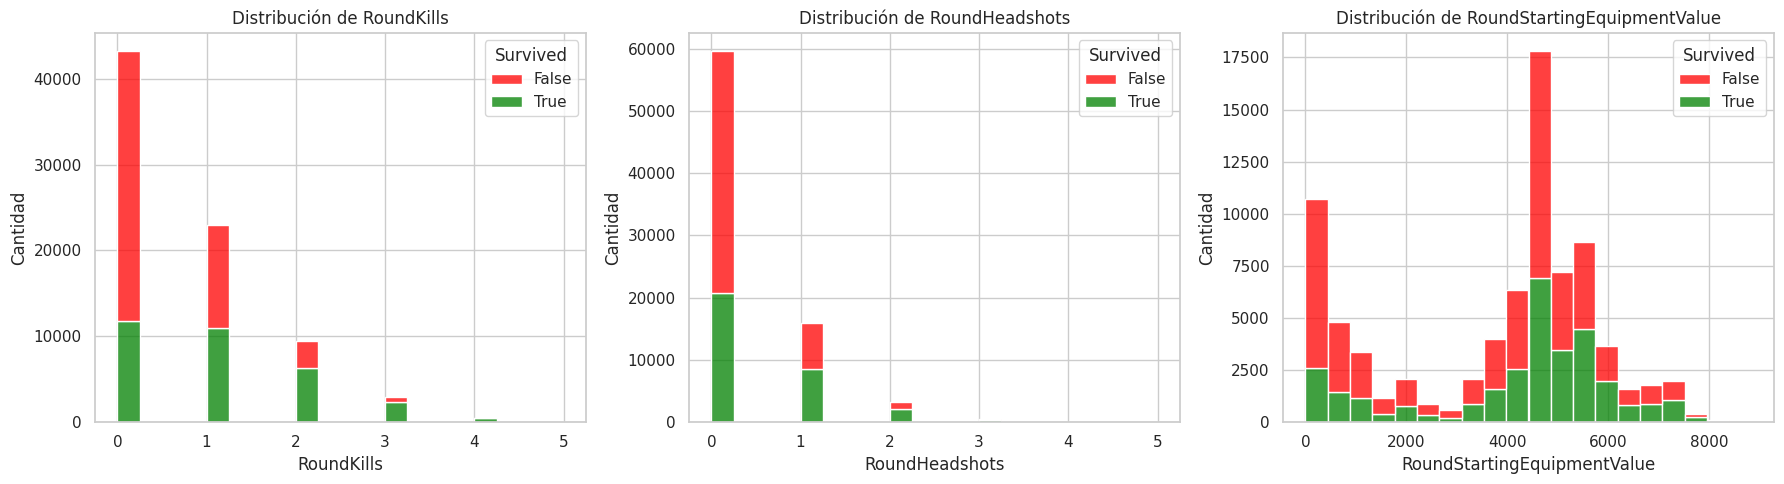

In [ ]:
variables = ['RoundKills', 'RoundHeadshots', 'RoundStartingEquipmentValue']

plt.figure(figsize=(18, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=var, hue='Survived', multiple='stack', palette={False: 'red', True: 'green'}, bins=20)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

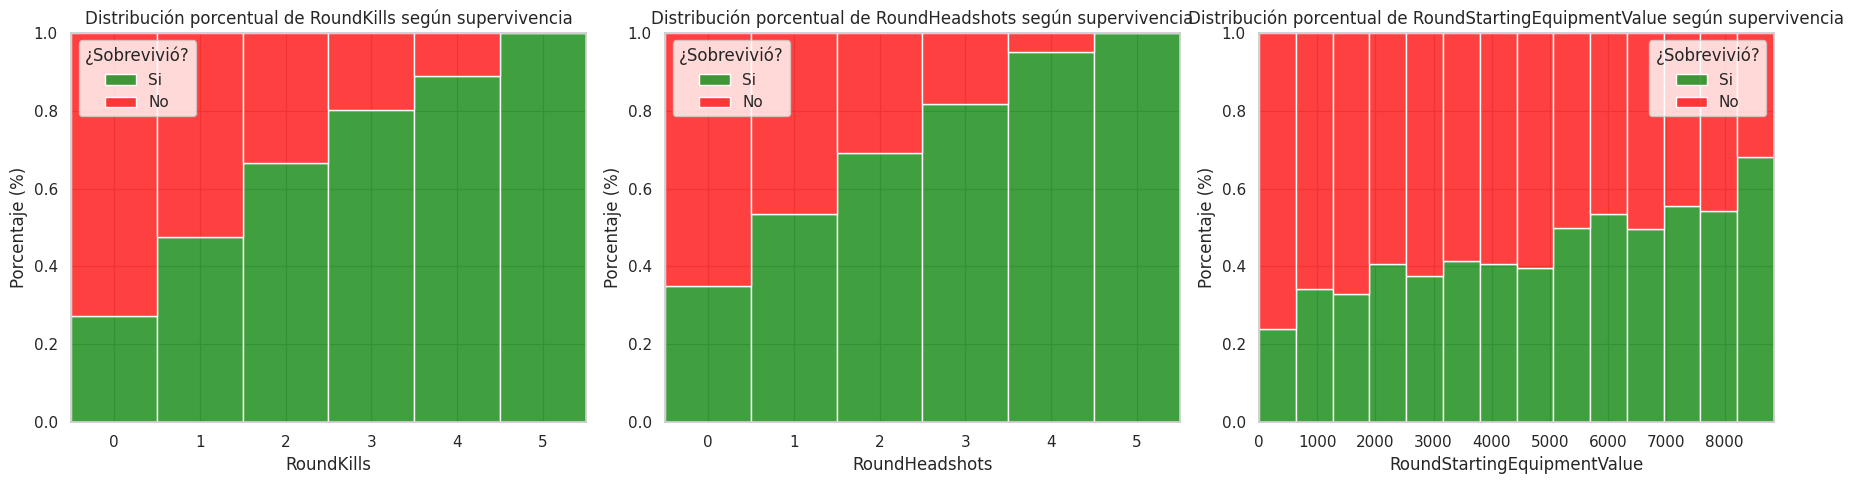

In [ ]:
variables = ['RoundKills', 'RoundHeadshots', 'RoundStartingEquipmentValue']

plt.figure(figsize=(18, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)

    # Definir los bins manualmente para que podamos controlar después
    if var == 'RoundStartingEquipmentValue':
        bins = np.linspace(df[var].min(), df[var].max(), 15)
    else:
        bins = np.arange(df[var].min(), df[var].max() + 2) - 0.5  # Para valores discretos como kills

    # Plot
    sns.histplot(
        data=df,
        x=var,
        hue='Survived',
        multiple='fill',    # MUY IMPORTANTE: fill para ver proporciones
        palette={False: 'red', True: 'green'},
        bins=bins,
        stat='percent'
    )

    plt.title(f'Distribución porcentual de {var} según supervivencia')
    plt.xlabel(var)
    plt.ylabel('Porcentaje (%)')
    plt.legend(title='¿Sobrevivió?', labels=['Si', 'No'])

plt.tight_layout()
plt.show()

<ipython-input-17-40a98789f8d2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-17-40a98789f8d2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-17-40a98789f8d2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


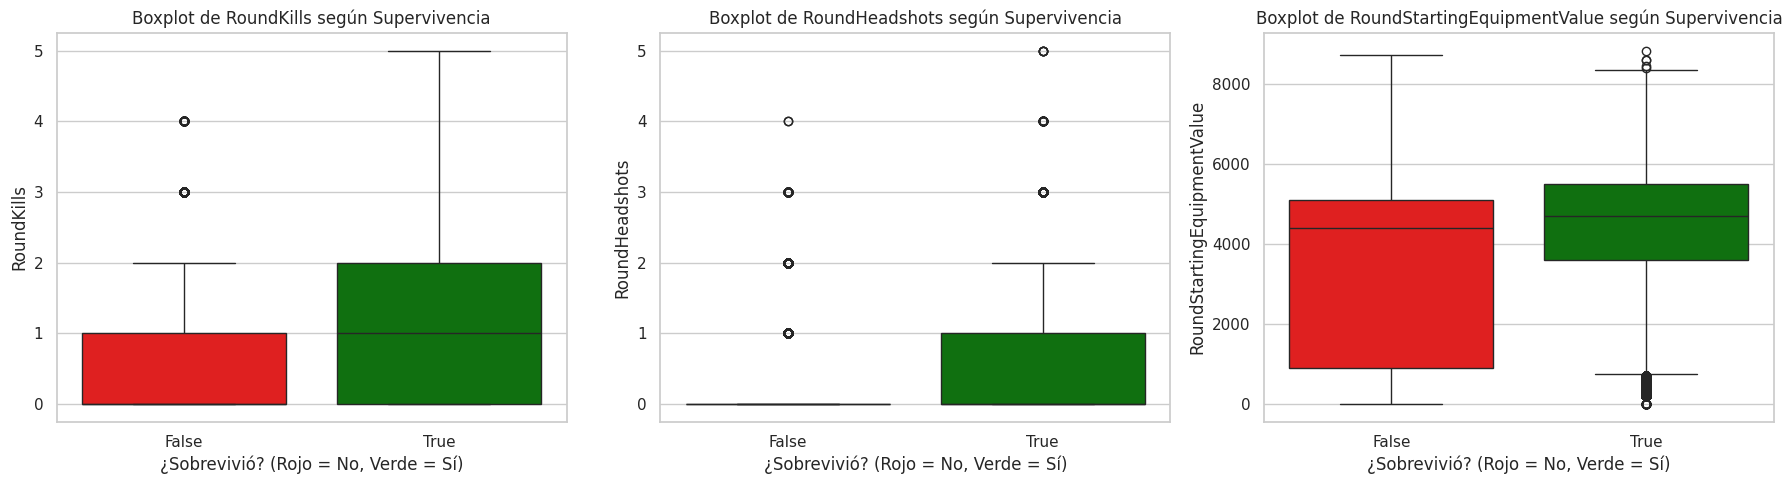

In [ ]:
variables = ['RoundKills', 'RoundHeadshots', 'RoundStartingEquipmentValue']

plt.figure(figsize=(18, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.boxplot(
        data=df,
        x='Survived',
        y=var,
        palette={'False': 'red', 'True': 'green'},
        dodge=False
    )
    plt.title(f'Boxplot de {var} según Supervivencia')
    plt.xlabel('¿Sobrevivió? (Rojo = No, Verde = Sí)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

## **2.1.7 OBJETIVO REGRESIÓN: : ¿El Valor del Equipamiento afecta en del Desempeño general del equipo?**#

In [ ]:
# Crear lista de variables para correlación
variables_seleccionadas = [
    'MatchWinner', 'TeamStartingEquipmentValue',
    'MatchKills', 'RoundKills',
    'MatchHeadshots', 'RoundHeadshots',
    'MatchFlankKills', 'RoundFlankKills'
]


Se decidió trabajar exclusivamente con la variable MatchWinner para representar el resultado de la partida, descartando RoundWinner debido a errores de tipeo detectados en los datos ('False4').

In [ ]:
df[variables_seleccionadas].describe().T

,count,mean,std,min,25%,50%,75%,max
TeamStartingEquipmentValue,79157.0,18890.133532,9743.203024,0.0,10900.0,22550.0,26050.0,36150.0
MatchKills,79157.0,8.511578,6.195079,0.0,3.0,8.0,13.0,41.0
RoundKills,79157.0,0.671349,0.881798,0.0,0.0,0.0,1.0,5.0
MatchHeadshots,79157.0,3.858484,3.246752,0.0,1.0,3.0,6.0,22.0
RoundHeadshots,79157.0,0.301553,0.578843,0.0,0.0,0.0,0.0,5.0
MatchFlankKills,79157.0,1.209912,1.435150,0.0,0.0,1.0,2.0,11.0
RoundFlankKills,79157.0,0.095633,0.320641,0.0,0.0,0.0,0.0,5.0


- Balance de resultados (MatchWinner):	la proporción de victorias y derrotas en el dataset está relativamente balanceada, lo que favorece futuros análisis de clasificación."

- Comportamiento de variables de desempeño:	el desempeño individual de los jugadores (kills, assists, headshots) muestra un comportamiento sesgado a la derecha, donde la mayoría logra rendimientos bajos o promedio, y unos pocos jugadores sobresalen significativamente (outliers positivos)."

- Relación esperada:	se puede anticipar que el valor del equipamiento (TeamStartingEquipmentValue) podría correlacionarse positivamente con métricas de desempeño como kills y headshots, dado que mejores armas usualmente permiten mayor efectividad en el juego."

- Qué ocurre con "TimeAlive" y "TravelledDistance", si bien el tiempo es una variable clave para saber cuanto dura cada equipo dentro de la partida y discriminar de mejor manera si el valor del equipamiento inluyó en ese resultado, el dataset presenta un grave error de tipeo [Object] - (340.272.074.099.723) es imposible que se pueda interpretar como milisegundos esa información por lo que no tiene sentido utilizar esa tabla para el análisis.

**Gráficas para la Hipótesis de regresión**

**R1. Histográmas**

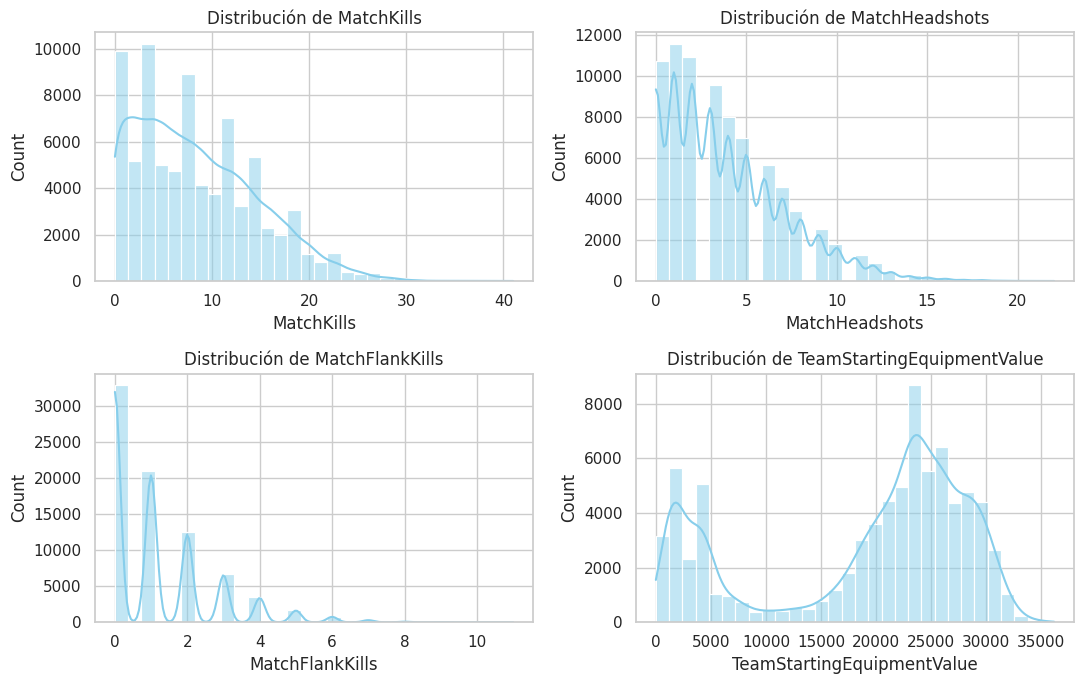

In [ ]:
# Variables que más destacan (por outliers y relevancia)
vars_visualizar = ['MatchKills', 'MatchHeadshots', 'MatchFlankKills', 'TeamStartingEquipmentValue']

# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(11, 7))

for var, ax in zip(vars_visualizar, axes.flatten()):
    sns.histplot(df[var], kde=True, ax=ax, bins=30, color='skyblue')
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)

plt.tight_layout()
plt.show()

Las distribuciones observadas presentan asimetría positiva (sesgo a la derecha), típico en competencias donde la mayoría de los jugadores obtienen pocas kills y sólo unos pocos sobresalen. Lo que se puede indicar es:

- Según el rendimiento del jugador, hay muchos jugadores con valores bajos.

- Pocos jugadores con valores muy altos, que lo más probable es que se concideren outliers.

Las curvas KDE muestran que los valores "típicos" están entre 0 y 5, pero algunos llegan a 20 o más como en el caso de la MatchSkills.

- El valor inicial del equipamiento (TeamStartingEquipmentValue) presenta una distribución bimodal, con picos en torno a valores bajos (3000) y valores altos (25000).

Confirmar visualmente si hay relación entre el equipamiento del equipo y sobrevivir.

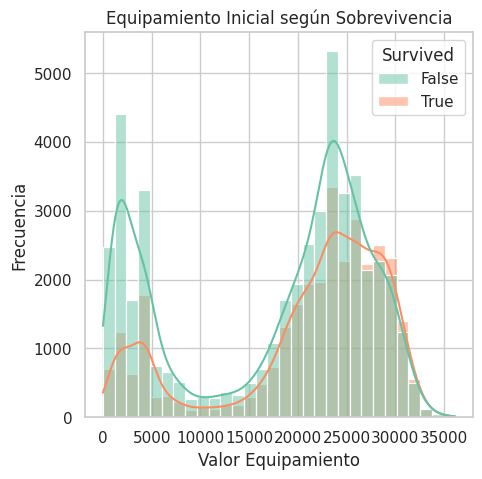

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(data=df, x='TeamStartingEquipmentValue', hue='Survived', kde=True, bins=30, palette='Set2')
plt.title('Equipamiento Inicial según Sobrevivencia')
plt.xlabel('Valor Equipamiento')
plt.ylabel('Frecuencia')
plt.show()

**R2. Boxplots**

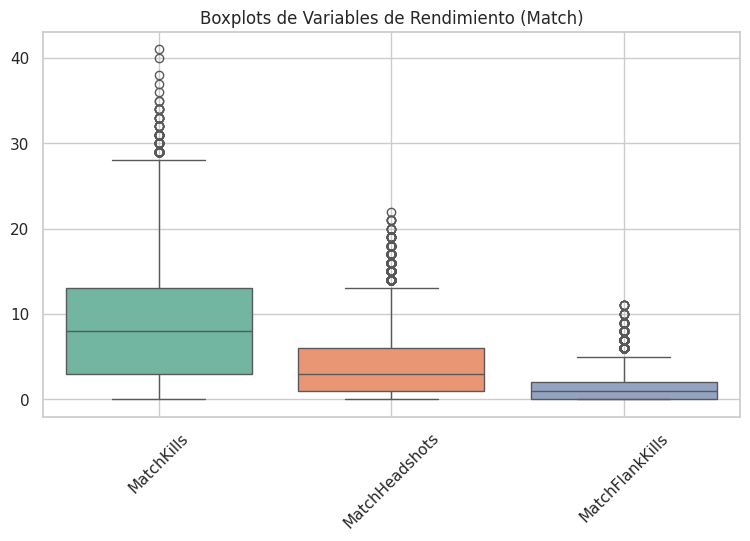

In [ ]:
# Visualizamos outliers
vars_boxplot = ['MatchKills', 'MatchHeadshots', 'MatchFlankKills']

plt.figure(figsize=(9, 5))
sns.boxplot(data=df[vars_boxplot], palette="Set2")
plt.title("Boxplots de Variables de Rendimiento (Match)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Los boxplots pueden avalar los resultados obtenidos en .describe():

- MatchKills tiene varios valores extremos (30+ kills).

- MatchHeadshots también tienen dispersión elevada.

- MatchFlankKills es de las más sesgadas (la mayoría hace 0 o 1).

En sí los datos "Atípicos" no se pueden considerar un error, sino una característica normal del rendimiento en juegos ya que la mayoría de jugadores hacen poco y unos pocos destacan (Predomina la habilidad).

Por lo que las variables de rendimiento de los jugadores presentan distribuciones claramente sesgadas a la derecha, con una alta concentración en valores bajos y presencia marcada de outliers. Esto refleja el comportamiento natural del juego, donde la mayoría de los jugadores tienen un impacto limitado, mientras que unos pocos concentran las estadísticas más destacadas.

**R3. Correlación**

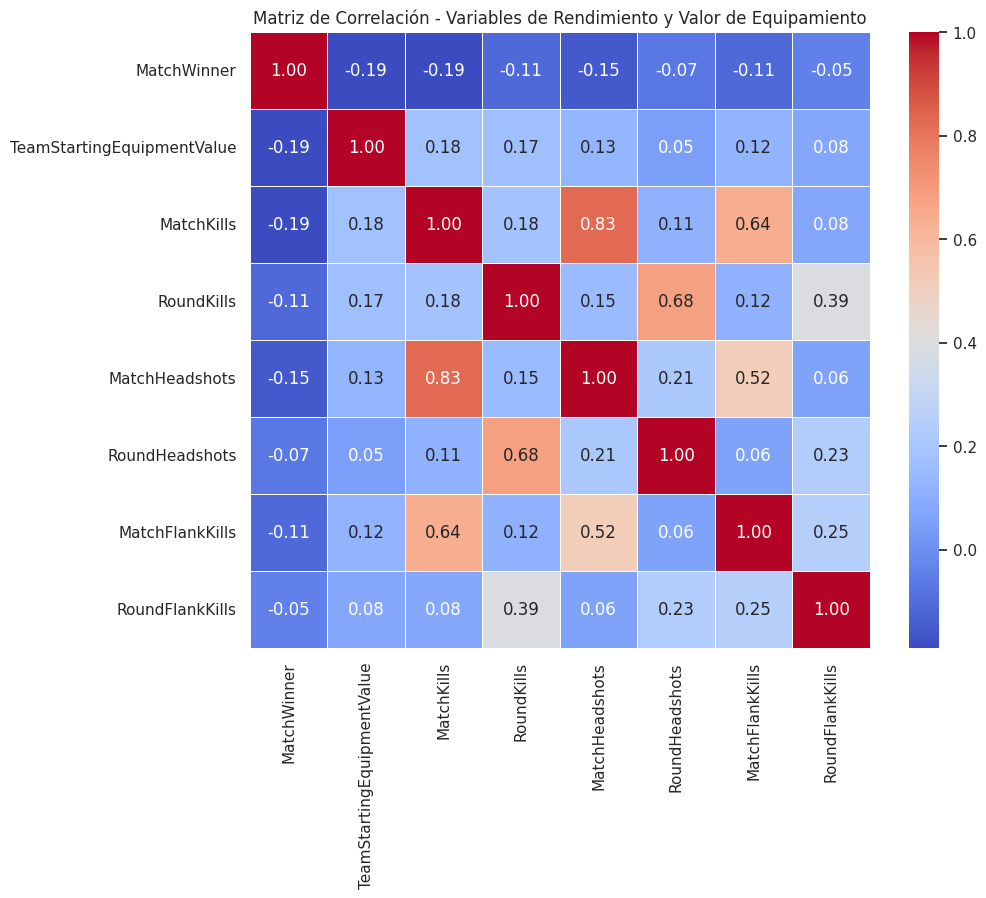

In [ ]:
# Calculamos la matriz de correlaciones
corr_matrix = df[variables_seleccionadas].corr()

# Creamos el heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Variables de Rendimiento y Valor de Equipamiento')
plt.show()


A partir del heatmap generado, se identificó que variables como MatchKills, RoundKills, MatchAssists, MatchHeadshots y MatchFlankKills presentan correlaciones positivas moderadas con el valor de equipamiento del equipo (TeamStartingEquipmentValue).

# Conclusiones hipóteis regresión.

- Las variables más correlacionadas serían MatchKills junto con MatchHeadshots (Mientras más muertes ocurran es más probable que una de ellas sea un headshot).

- Variables mal interpretadas como TimeAlive y TravelledDistance serán corregidas más adelante porque ambas están mal tipeadas o ingresadas. Por el momento es imposible que los supuestos milisegundos tengas más de 15 dígitos.

- El equipamiento no garantiza un rendimiento alto: se puede concluir que no necesariamente el rendimiento individual del equipo se ve afectado por el valor de gastado en equipamiento, sino más bien por habilidad de los jugadores (estrategia, habilidad, coordinación). Por lo que la inversión del equipamiento es relativo a cada jugador para garantizar su vitoria.

---
## Fase 3: Data Preparation
---

## Problemas con las variables:

* RoundWinner: Tiene valores inconsistentes: ['False', 'True', 'False4', True, False]. Hay un valor inválido: 'False4'. Corregir 'False4' a 'False' y convertir toda la columna a booleano.
* MatchWinner: Es tipo object, pero debería ser booleana (True/False). Se debe Convertir sus valores a tipo booleano (True o False).
* TimeAlive: Es de tipo Object y a parte los valores son demasiado grandes para representar segundos. Parece estar en otra unidad. Revisar la escala. Puede estar en milisegundos; dividir entre 1000.
* TravelledDistance: Es de tipo Object y a parte los valores son demasiado grandes para representar su unidad de medida.
* AbnormalMatch: Todos los valores son 'False', no aporta información (variable inútil).
Eliminar la columna.
* Team: Decidir que hacer con sus 2 valores nulos.

## Corrección de la Variable RoundWinner

##Eliminar los datos inconsistentes de RoundWinner

In [3]:
#Correción de valor manualmente
df['RoundWinner'] = df['RoundWinner'].replace({'False4': 'False'})

# Verifica si hay más valores erróneos
print(df['RoundWinner'].unique())

['False' 'True' True False]


In [4]:
# Correción de valores convirtiéndolos a cadenas de texto
df['RoundWinner'] = df['RoundWinner'].astype(str)

# Verifica los valores únicos después de la corrección
print(df['RoundWinner'].unique())

['False' 'True']


##Visualización de gráfico de la variable RoundWinner después de la limpieza

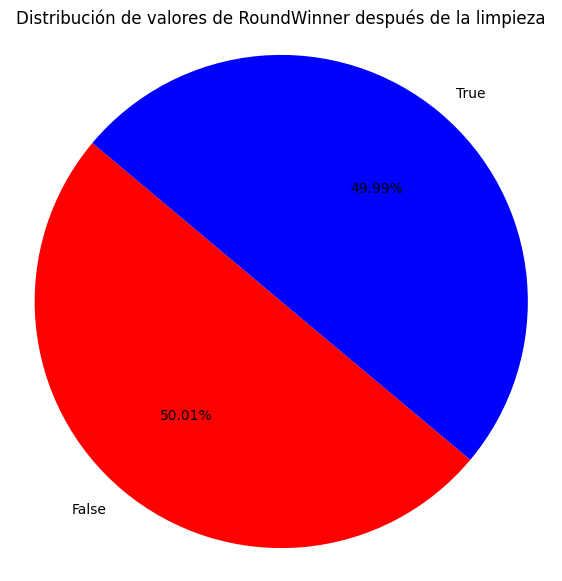

In [5]:
# Conteo de valores de RoundWinner
counts = df['RoundWinner'].value_counts()

# Gráfico circular
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=counts.index, autopct=lambda p: '{:.2f}%'.format(p),
        colors=['red', 'blue'], startangle=140)
plt.title('Distribución de valores de RoundWinner después de la limpieza')
plt.axis('equal')
plt.show()

In [6]:
recuento = pd.value_counts(df['RoundWinner'])
print(recuento)

RoundWinner
False    39589
True     39568
Name: count, dtype: int64


<ipython-input-6-c54f5c46a06c>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  recuento = pd.value_counts(df['RoundWinner'])


In [7]:
# Cambiar la variable RoundWinner a tipo booleano
# Primero, mapeamos las cadenas a valores booleanos
df['RoundWinner'] = df['RoundWinner'].map({'True': True, 'False': False})

# Verificamos el tipo de datos y que esté bien
print(df['RoundWinner'].dtypes)
print(df['RoundWinner'].unique())

bool
[False  True]


## Imputar nulos de la Variable MatchWinner

In [8]:
# verificamos los valores únicos de la variable MatchWinner
print(df['MatchWinner'].unique())

[True False nan]


In [9]:
# Se hace un recuento de los valores únicos para saber por cuál se podría reemplazar el valor nulo
recuento = pd.value_counts(df['MatchWinner'])
print(recuento)

MatchWinner
False    42017
True     37139
Name: count, dtype: int64


<ipython-input-9-4829ca1516c5>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  recuento = pd.value_counts(df['MatchWinner'])


In [10]:
# Buscar el valor más frecuente en MatchWinner
valor_mas_frecuente = df['MatchWinner'].mode()[0]

# Imputar nulos con ese valor
df['MatchWinner'].fillna(valor_mas_frecuente, inplace=True)

<ipython-input-10-d4c115e9bbc1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MatchWinner'].fillna(valor_mas_frecuente, inplace=True)
<ipython-input-10-d4c115e9bbc1>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MatchWinner'].fillna(valor_mas_frecuente, inplace=True)


In [11]:
# Verificamos si hay valores nulos después de la conversión
print(df['MatchWinner'].unique())

[ True False]


## Imputar nulos de la Variable Team

In [12]:
# Calcula la cantidad de valores nulos
null_values = df.isnull().sum()

#Filtra los valores
null_values = null_values[null_values > 0]

print (null_values)

Team    2
dtype: int64


In [13]:
# Se crea una función para imputar los valores nulos de la columna 'Team' de forma secuencial
# ya que los valores cambian cada 5 filas.
# y no se puede imputar con el valor más frecuente ya que no es el mismo para cada fila.

def imputar_team_secuencial(dfc):
    if 'Team' not in dfc.columns:
        raise ValueError("La columna 'Team' no existe en el DataFrame.")

    equipo_ciclo = ['Terrorist'] * 5 + ['CounterTerrorist'] * 5

    for index, row in dfc.iterrows():
        if pd.isna(row['Team']):
            ciclo_index = index % 10
            dfc.at[index, 'Team'] = equipo_ciclo[ciclo_index]

    return dfc

# Aplicar
df = imputar_team_secuencial(df)

## Corregir Valores de las Variables TimeAlive y TravelledDistance

In [14]:
# Limpiar formato europeo y convertir a float
def limpiar_formato_europeo(columna):
    columna = columna.astype(str).str.replace('.', '', regex=False)   # eliminar puntos de miles
    columna = columna.str.replace(',', '.', regex=False)              # cambiar coma decimal
    return pd.to_numeric(columna, errors='coerce')                    # convertir a float

# Aplicar a las dos variables
df['TimeAlive'] = limpiar_formato_europeo(df['TimeAlive'])
df['TravelledDistance'] = limpiar_formato_europeo(df['TravelledDistance'])

# Revisar tipos de datos
print(df[['TimeAlive', 'TravelledDistance']].dtypes)


TimeAlive              int64
TravelledDistance    float64
dtype: object


In [15]:
# Corregir la escala dividiendo
df['TimeAlive'] = df['TimeAlive'] / 1e14
df['TravelledDistance'] = df['TravelledDistance'] / 1e14

# Verificar cómo quedó
print(df[['TimeAlive', 'TravelledDistance']].describe())

          TimeAlive  TravelledDistance
count  79157.000000       79157.000000
mean     121.340388         120.796028
std      143.511751         128.652825
min        0.000000           0.000000
25%       44.191762          52.240739
50%       76.599780          87.710295
75%      108.037457         132.412460
max      639.828759         666.849684


En este caso se puede ver que los valores máximos son demasiado altos, los cuales deben ser transformados o remplazados según algunos factores que se relacionen a estas variables y queden datos más consistentes, cercanos o parecidos al del promedio de cada variable.